In [1]:
pip install pytrends matplotlib pandas seaborn plotly

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

#setup pytrend library and keyword define

In [14]:
pytrends = TrendReq(hl = 'en-US',tz= 360)
keyword = "Cloud Computing"

Data Request

In [17]:
pytrends.builds_payload([keyword], cat = 0,timeframe = 'today 12-m', geo=''.gprop ='')

SyntaxError: invalid syntax (2628750296.py, line 1)

In [19]:
pytrends.build_payload([keyword], 
                       cat=0, 
                       timeframe='today 12-m', 
                       geo='', 
                       gprop='')


# country wise interest

In [24]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword,ascending = False).head(15)

In [26]:
plt.figure(figsize=(10,6))
plt.barplot(x = region_data[keyword],y = region_data.index,palette = "Blues_d")
plt.title(f"Top Countries Searching for '{keyword}' ")
plt.xlabel("Interest")
plt.ylabel("country")
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'barplot'

<Figure size 1000x600 with 0 Axes>

C:\Users\DELL\AppData\Local\Temp\ipykernel_31216\1193239018.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_data[keyword], y=region_data.index, palette="Blues_d")


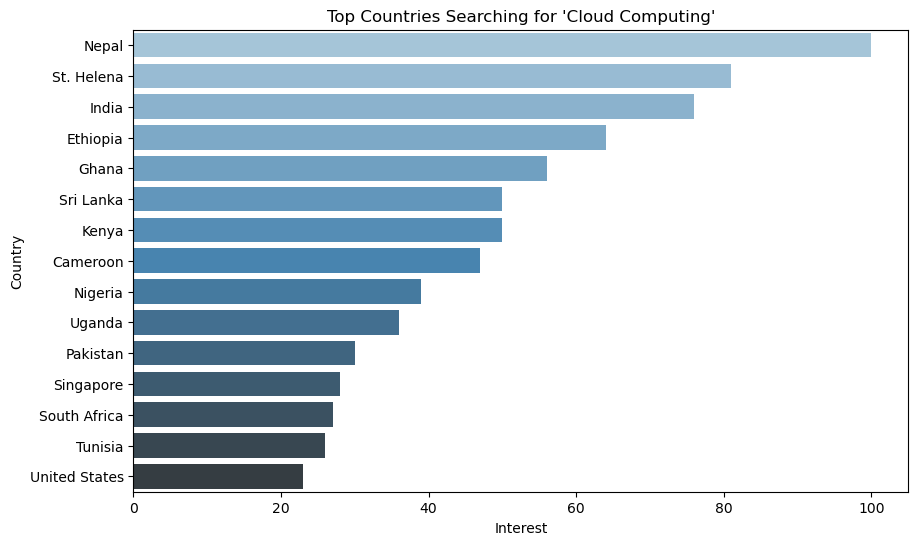

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x=region_data[keyword], y=region_data.index, palette="Blues_d")
plt.title(f"Top Countries Searching for '{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()


#world map

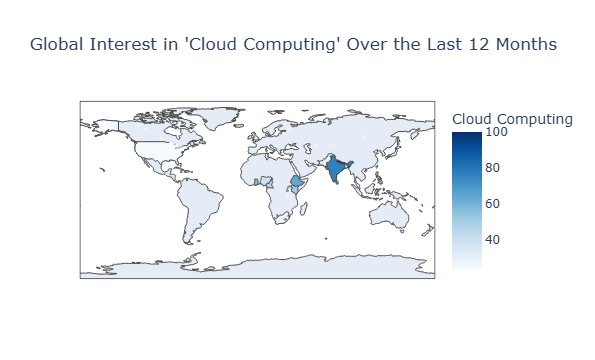

In [36]:
import plotly.express as px

# Ensure the country names are in a column
region_data = region_data.reset_index()  # 'geoName' will be your country column
region_data.rename(columns={'geoName':'country'}, inplace=True)  # optional, for clarity

# Create choropleth map
fig = px.choropleth(region_data,
                    locations='country',   # column with country names
                    locationmode='country names', 
                    color=keyword,         # values to color by
                    color_continuous_scale='Blues',
                    title=f"Global Interest in '{keyword}' Over the Last 12 Months")

fig.show()


#time wise interest

In [38]:
time_df = pytrends.interest_over_time()

C:\Users\DELL\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



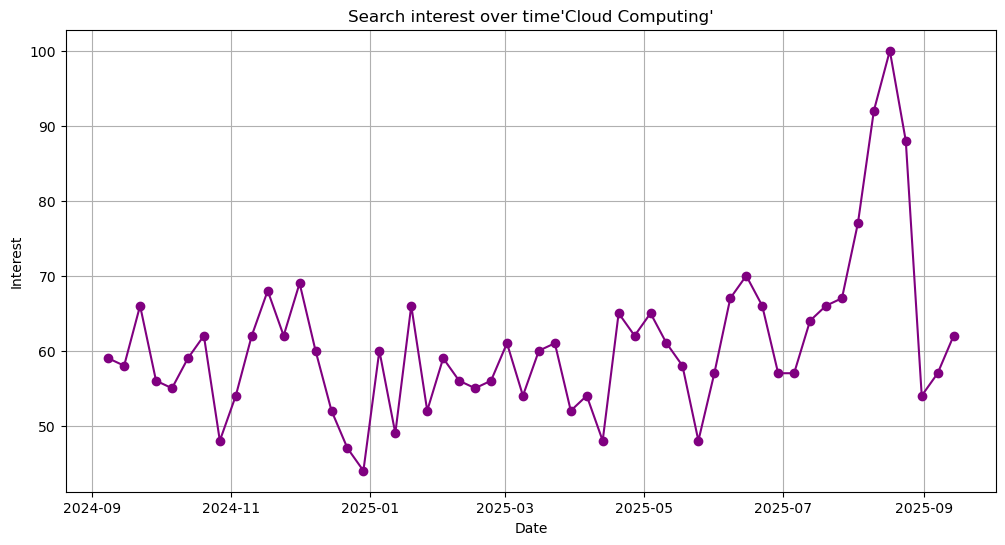

In [40]:
plt.figure(figsize=(12,6))

plt.plot(time_df.index,time_df[keyword],marker = 'o',color = 'purple')
plt.title(f"Search interest over time'{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

# multiple keywords compare

In [43]:
kw_list = ["cloud computing", "data Science", "machine learning"]
pytrends.build_payload(kw_list,cat =0,timeframe = 'today 12-m',geo = '',gprop='')

C:\Users\DELL\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



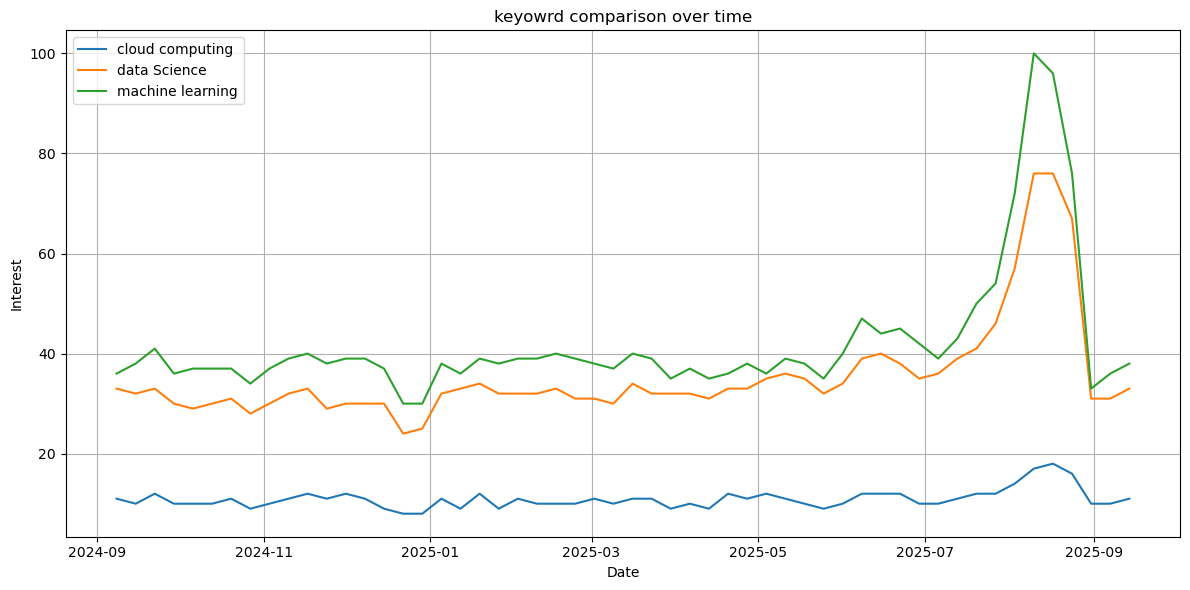

In [48]:
compare_df = pytrends.interest_over_time()
plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw],label = kw)

plt.title("keyowrd comparison over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
